In [ ]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=9eaa44afb82d250c1ef61247cea32ff43a79e1481a534007a934a2431774caff
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import pandas_datareader.data as pdr
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh') #Bayesian Methods for Hackers style
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Load data
yf.pdr_override()

start_date = '01-01-1983'
end_date = '1-9-2021'

company = 'NKE'

start = datetime.strptime(start_date, '%d-%m-%Y')
end = datetime.strptime(end_date, '%d-%m-%Y')
df = pdr.get_data_yahoo(company, data_source='yahoo', start=start, end=end)
df.round(2)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1983-01-03,0.35,0.36,0.34,0.34,0.25,14604800
1983-01-04,0.34,0.34,0.33,0.34,0.25,17420800
1983-01-05,0.34,0.34,0.33,0.34,0.25,17100800
1983-01-06,0.34,0.37,0.34,0.36,0.27,21107200
1983-01-07,0.36,0.36,0.32,0.33,0.24,43430400
...,...,...,...,...,...,...
2021-08-25,170.00,170.69,169.53,169.84,169.56,3003800
2021-08-26,169.38,169.52,166.27,166.92,166.65,4069600
2021-08-27,167.27,168.07,166.28,167.58,167.58,3010400


In [ ]:
#Create a new dataframe with only the 'Close'
data = df.filter(['Close'])
data

,Close
Date,
1983-01-03,0.343750
1983-01-04,0.340820
1983-01-05,0.335938
1983-01-06,0.361328
1983-01-07,0.332031
...,...
2021-08-25,169.839996
2021-08-26,166.919998
2021-08-27,167.580002


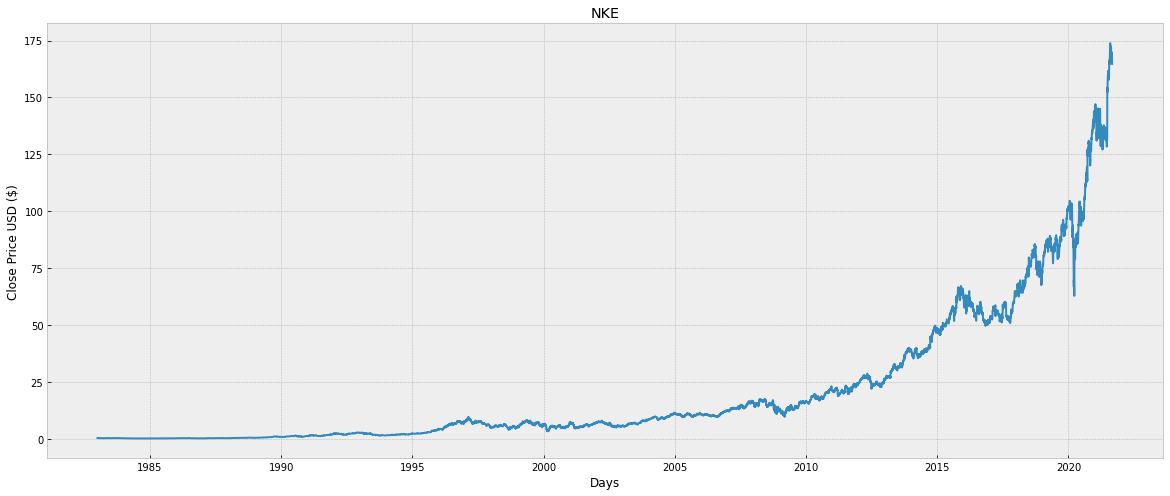

In [ ]:
#Visualize the close price data
plt.figure(figsize=(20,8))
plt.title(company)
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(data['Close'])
plt.show()
#Timeseries: RNN
#Impor: Preprocessdata->learn pattern
#World predict changes not value

In [ ]:
#Prepare data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
len(scaled_data)

9748

In [ ]:
#Create x_train, y_train
prediction_days = 60
x_train = []
y_train = []
for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape x_train
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(9688, 60, 1)

In [ ]:
#Build the LSTM Model
model = keras.Sequential()
#RNN:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs = 100, batch_size = 32)
model.save('/content/driver/My Drive/Colab Notebooks/model/stock03.h5')

Epoch 1/100
303/303 [==============================] - 25s 61ms/step - loss: 0.0014
Epoch 2/100
303/303 [==============================] - 18s 61ms/step - loss: 6.9060e-04
Epoch 3/100
303/303 [==============================] - 19s 61ms/step - loss: 5.7753e-04
Epoch 4/100
303/303 [==============================] - 18s 61ms/step - loss: 5.5884e-04
Epoch 5/100
303/303 [==============================] - 18s 61ms/step - loss: 5.0999e-04
Epoch 6/100
303/303 [==============================] - 18s 60ms/step - loss: 4.8760e-04
Epoch 7/100
303/303 [==============================] - 18s 60ms/step - loss: 4.3085e-04
Epoch 8/100
303/303 [==============================] - 18s 61ms/step - loss: 4.1671e-04
Epoch 9/100
303/303 [==============================] - 18s 60ms/step - loss: 4.6416e-04
Epoch 10/100
303/303 [==============================] - 18s 61ms/step - loss: 4.1670e-04
Epoch 11/100
303/303 [==============================] - 18s 61ms/step - loss: 3.9115e-04
Epoch 12/100
303/303 [============

In [ ]:
#Load the test data
yf.pdr_override()

start_date = '02-09-2021'
end_date = '31-10-2021'

start = datetime.strptime(start_date, '%d-%m-%Y')
end = datetime.strptime(end_date, '%d-%m-%Y')
test_data = pdr.get_data_yahoo(company, data_source='yahoo', start=start, end=end)

actual_prices = test_data['Close'].values
total_dataset = pd.concat((data['Close'],test_data['Close']), axis = 0)
inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
print(test_data)
#Visualize the test data
plt.figure(figsize=(20,8))
plt.title(company)
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(test_data['Close'])
plt.show()

In [ ]:
#Prediction on test data
x_test = []
for x in range(prediction_days, len(inputs)):
  x_test.append(inputs[x-prediction_days:x, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model = keras.models.load_model('/content/driver/My Drive/Colab Notebooks/model/stock03.h5')
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [ ]:
#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import tensorflow as tf
x_test = tf.convert_to_tensor(x_test, dtype = tf.float32)
# Evaluating confusion matric
res = tf.math.confusion_matrix(x_test,predicted_prices)


# Printing the result
print('Confusion_matrix: ',res)

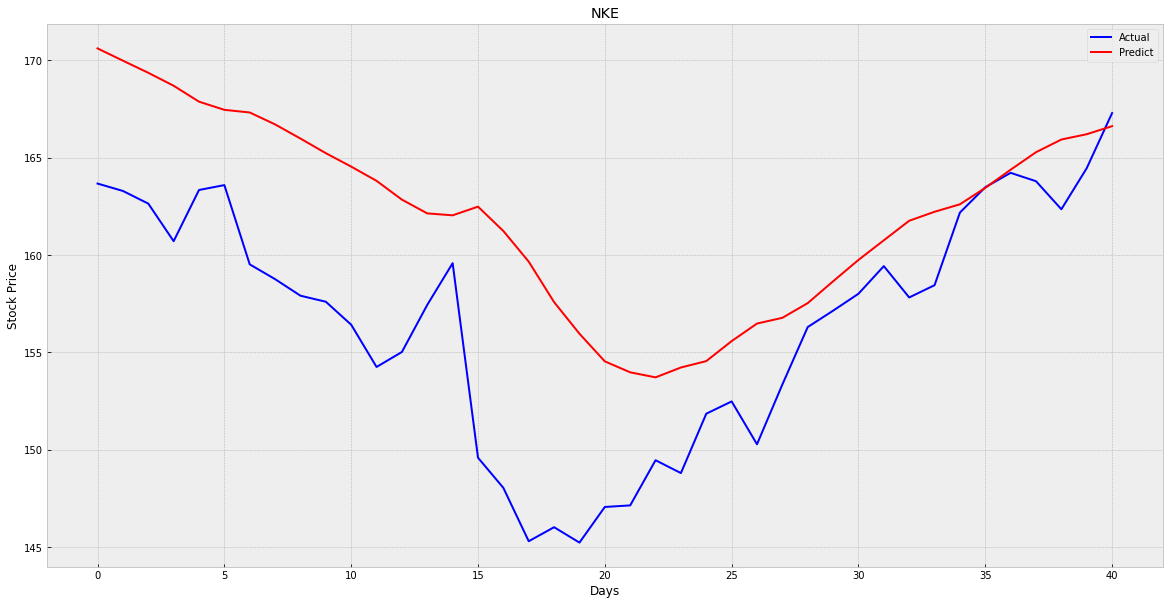

In [ ]:
#visualize the data
plt.figure(figsize=(20,10))
plt.title(company)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.plot(actual_prices, color="blue")
plt.plot(predicted_prices, color="red")
plt.legend(['Actual', 'Predict'])
plt.show()

In [ ]:
#Predict the next day
real_data = [inputs[len(inputs) + 1 - prediction_days:len(inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
prediction = model.predict(real_data)

aa=float((prediction-inputs[-1])*100)

prediction = scaler.inverse_transform(prediction)
print(f"Prediction of the next day: {prediction}")
print(f"Predict: {aa:.2f}%")

Prediction of the next day: [[168.51387]]
Predict: 0.39%
